In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import Subset




In [ ]:
class Model(nn.Module):

    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(1,32,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32,64,5)
        self.fc1 = nn.Linear(1024, 120)
        self.fc2 = nn.Linear(120,50)
        self.out = nn.Linear(50,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.dropout2d(x, 0.3)
        x = self.pool(F.relu(self.conv2(x)))
        x = F.dropout2d(x, 0.3)
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x




In [23]:
dataset = torchvision.datasets.MNIST('/Users/adithyashanker/desktop/NeuralNetwork', train=True, download=True,
                                     transform=torchvision.transforms.Compose([
                                         torchvision.transforms.ToTensor(),
                                         torchvision.transforms.Normalize((0.1307,), (0.3081,))
                                     ]))

testset = torchvision.datasets.MNIST('/Users/adithyashanker/desktop/NeuralNetwork', train=False, download=True,
                                     transform=torchvision.transforms.Compose([
                                         torchvision.transforms.ToTensor(),
                                         torchvision.transforms.Normalize((0.1307,), (0.3081,))
                                     ]))

print(len(dataset))

subset_indices = np.random.choice(len(dataset), size=30000, replace=False)  # e.g., 10,000 examples
subset_dataset = Subset(dataset, subset_indices)

testset_indices = np.random.choice(len(testset), size=10000, replace=False)  # e.g., 10,000 examples
test_dataset = Subset(testset, testset_indices)

train_loader = torch.utils.data.DataLoader(subset_dataset, batch_size=500, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=500, shuffle=True)





60000


In [ ]:
model = Model()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.011)

In [ ]:
epochs = 100
losses = []

#  y_pred = model.forward(X_train)
#     loss = criterion(y_pred, Y_train)
#     losses.append(loss.detach().numpy())
    # if i%10 == 0 :
    #     print(f'epoch {i} loss = {loss}')
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

for epoch in range(epochs) :
    p = 0
    for i, data in enumerate(train_loader, 0):
        inputs, outputs = data
        
        # print(inputs)
        # print(outputs)

        y_pred = model.forward(inputs)
        loss = criterion(y_pred, outputs)
        losses.append(loss.detach().numpy())
        if epoch%10 == 0 and p == 0 :
            print(f'epoch {epoch} loss = {loss}')
            p = 1
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



    

In [41]:
with torch.no_grad():
    for i, data in enumerate(test_loader):
        xTest, yTest = data
        y_eval = model.forward(xTest)
        loss = (criterion(y_eval, yTest))




In [42]:
loss

tensor(0.0743)

In [24]:
correct = 0
model.eval() 
with torch.no_grad():
    for i, data in enumerate(test_loader):
        xTest, yTest = data
        y_val = model(xTest)  
        predicted_labels = y_val.argmax(dim=1)
        correct += (predicted_labels == yTest).sum().item() 

        # for j in range(xTest.size(0)):
        #     print(f'Input: {xTest[j]} Prediction: {predicted_labels[j]} Actual: {yTest[j]}')

print(f'Correct Predictions: {correct}')

           


Correct Predictions: 9787


In [ ]:
losses[len(losses)-1]

In [ ]:
torch.save(model, 'model.pth')


Text(0, 0.5, 'loss')

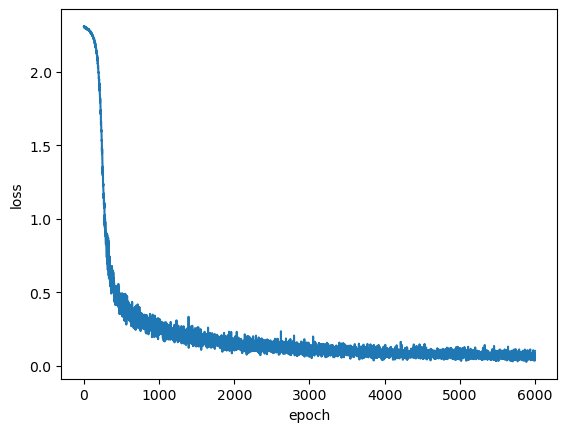

In [34]:
plt.plot(range(6000), losses)
plt.xlabel('epoch')
plt.ylabel('loss')